# Loading the Dataset

In [36]:
import pandas as pd

header = pd.read_csv('./har/UCI HAR Dataset/features.txt', sep=' ', index_col=0, names=['feature'])
header
epochs=100
trials=5

In [37]:
header[header.duplicated(subset=['feature'])]

,feature
317,"fBodyAcc-bandsEnergy()-1,8"
318,"fBodyAcc-bandsEnergy()-9,16"
319,"fBodyAcc-bandsEnergy()-17,24"
320,"fBodyAcc-bandsEnergy()-25,32"
321,"fBodyAcc-bandsEnergy()-33,40"
...,...
498,"fBodyGyro-bandsEnergy()-17,32"
499,"fBodyGyro-bandsEnergy()-33,48"
500,"fBodyGyro-bandsEnergy()-49,64"
501,"fBodyGyro-bandsEnergy()-1,24"


In [38]:
X = pd.read_csv('./har/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [39]:
from keras.src.utils import np_utils
y = pd.read_csv('./har/UCI HAR Dataset/train/y_train.txt', header=None, names=['label']).apply(lambda x: x - 1)
y = np_utils.to_categorical(y, num_classes=6)
y

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

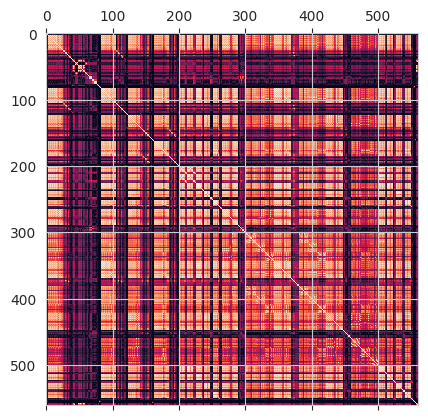

In [40]:
import matplotlib.pyplot as plt

correlation_matrix = X.corr().abs()

plt.matshow(correlation_matrix)
plt.show()

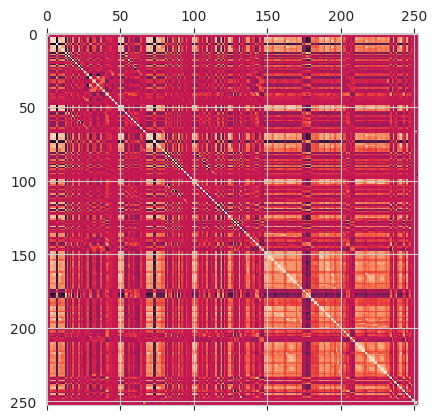

In [41]:
upper_correlation_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_correlation_matrix.columns if any(upper_correlation_matrix[column] > 0.95)]
X.drop(to_drop, axis=1, inplace=True)

plt.matshow(X.corr())
plt.show()

In [42]:
X

,0,1,2,3,4,5,11,14,17,18,...,538,539,545,550,551,552,554,555,556,557
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.744413,0.814263,-0.999863,-0.994612,...,-0.128989,0.586156,-0.991048,-1.000000,-0.074323,-0.298676,-0.112754,0.030400,-0.464761,-0.018446
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.818409,0.822637,-0.999788,-0.998405,...,-0.271958,-0.336310,-0.994440,-1.000000,0.158075,-0.595051,0.053477,-0.007435,-0.732626,0.703511
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.818409,0.839344,-0.999660,-0.999470,...,-0.212728,-0.535352,-0.995866,-0.555556,0.414503,-0.390748,-0.118559,0.177899,0.100699,0.808529
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.829711,0.837869,-0.999736,-0.999504,...,-0.035684,-0.230091,-0.995732,-0.936508,0.404573,-0.117290,-0.036788,-0.012892,0.640011,-0.485366
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.824705,0.837869,-0.999856,-0.999757,...,-0.273582,-0.510282,-0.997418,-0.936508,0.087753,-0.351471,0.123320,0.122542,0.693578,-0.615971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.076700,0.266917,-0.788077,-0.473463,...,-0.376234,-0.170845,-0.925241,-0.904762,-0.070157,-0.588433,-0.190437,0.829718,0.206972,-0.425619
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.031966,0.266917,-0.804546,-0.495789,...,-0.296176,0.019626,-0.761880,-0.904762,0.165259,-0.390738,0.064907,0.875679,-0.879033,0.400219
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,0.055411,0.264670,-0.844279,-0.271194,...,-0.320249,0.490169,-0.692582,-0.904762,0.195034,0.025145,0.052806,-0.266724,0.864404,0.701169
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,0.055411,0.264670,-0.846871,-0.279718,...,-0.412332,0.308105,-0.886154,-0.904762,0.013865,0.063907,-0.101360,0.700740,0.936674,-0.589479


In [43]:
from sklearn.model_selection import train_test_split
import numpy as np

n = 0.3
random_seed = 42
np.random.seed(random_seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n, random_state=random_seed)
X_train

,0,1,2,3,4,5,11,14,17,18,...,538,539,545,550,551,552,554,555,556,557
4578,0.284320,-0.019893,-0.118184,-0.990051,-0.983800,-0.970274,-0.810197,0.833859,-0.999874,-0.999047,...,-0.057645,-0.309221,-0.994614,-0.936508,0.240570,-0.333416,0.067654,0.055710,0.332906,0.563997
3027,0.267326,-0.024155,-0.078986,-0.393155,-0.152924,-0.199935,-0.428731,0.256988,-0.860608,-0.709534,...,-0.317248,-0.401919,-0.840643,-0.904762,0.124565,-0.172346,0.306129,-0.594474,0.828610,0.846243
3407,0.327495,-0.057756,-0.178172,0.071035,0.013070,-0.061259,-0.314871,0.349485,-0.798543,-0.597033,...,-0.034555,-0.186315,-0.751486,-0.904762,0.065099,-0.727589,-0.453172,0.807221,-0.951796,0.603144
613,0.203195,-0.038447,-0.138711,-0.309882,-0.022839,-0.379230,-0.413209,0.298094,-0.814386,-0.822508,...,0.238002,-0.400589,-0.804827,-0.873016,-0.120821,-0.185789,0.339867,0.399665,0.022148,0.073721
3208,0.396326,-0.027872,-0.148761,0.368238,0.009455,0.203998,-0.420172,-0.188743,-0.802708,-0.351513,...,0.109874,-0.448950,-0.467036,-0.873016,0.296752,-0.278142,-0.726925,-0.307535,0.818037,-0.701293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.278897,-0.030306,-0.096043,-0.555352,-0.104055,-0.438064,-0.373579,0.475699,-0.844046,-0.854676,...,-0.265724,-0.490616,-0.979544,-0.904762,0.022624,0.417731,-0.155279,-0.137981,0.929236,-0.583898
5226,0.289183,-0.049248,-0.125083,-0.290043,-0.212102,-0.469731,-0.123285,0.577615,-0.877411,-0.869941,...,0.041601,-0.846175,-0.945451,-0.904762,-0.039773,-0.021970,-0.019533,-0.896005,-0.039591,0.494178
5390,0.293946,-0.018341,-0.119916,-0.627198,-0.216566,-0.424764,-0.441355,0.469639,-0.880613,-0.847948,...,-0.185158,-0.609038,-0.957445,-0.904762,0.094031,0.527152,-0.414621,-0.488542,0.095895,-0.297162
860,0.280475,-0.018976,-0.113756,-0.994825,-0.985314,-0.965857,-0.805684,0.828575,-0.999897,-0.998961,...,0.099050,-0.327943,-0.994633,-0.682540,0.539885,-0.889671,-0.079515,0.014291,-0.290347,0.602344


In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_heldback = pd.read_csv('./har/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)[X.columns]
y_heldback = pd.read_csv('./har/UCI HAR Dataset/test/y_test.txt', header=None, names=['label']).apply(lambda x: x - 1)
y_heldback = np_utils.to_categorical(y_heldback, num_classes=6)

def print_metrics(model, X_train, X_test, X_heldback):
    # Fit the best model to get the history object (if not already available)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=10, validation_data=(X_test, y_test), verbose=1)

    # Extract accuracy and loss values
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot training & validation accuracy
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

    # Predict on test data
    y_pred = model.predict(X_heldback)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
    y_true = np.argmax(y_heldback, axis=1)  # Assuming y_test is also one-hot encoded

    # Generate classification report
    target_names = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
    report = classification_report(y_true, y_pred_classes, target_names=target_names, zero_division=0)
    print(report)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Plotting the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


Epoch 1/100
515/515 [==============================] - 3s 4ms/step - loss: 8.8626 - accuracy: 0.1667 - precision_1: 0.1577 - recall_1: 0.4712 - val_loss: 8.7386 - val_accuracy: 0.1659 - val_precision_1: 0.1606 - val_recall_1: 0.4819
Epoch 2/100
515/515 [==============================] - 2s 3ms/step - loss: 8.8045 - accuracy: 0.1671 - precision_1: 0.1577 - recall_1: 0.4732 - val_loss: 8.7386 - val_accuracy: 0.1659 - val_precision_1: 0.1606 - val_recall_1: 0.4819
Epoch 3/100
515/515 [==============================] - 1s 3ms/step - loss: 8.8045 - accuracy: 0.1671 - precision_1: 0.1577 - recall_1: 0.4732 - val_loss: 8.7386 - val_accuracy: 0.1659 - val_precision_1: 0.1606 - val_recall_1: 0.4819
Epoch 4/100
515/515 [==============================] - 2s 3ms/step - loss: 8.8045 - accuracy: 0.1671 - precision_1: 0.1577 - recall_1: 0.4732 - val_loss: 8.7386 - val_accuracy: 0.1659 - val_precision_1: 0.1606 - val_recall_1: 0.4819
Epoch 5/100
515/515 [==============================] - 2s 3ms/step -

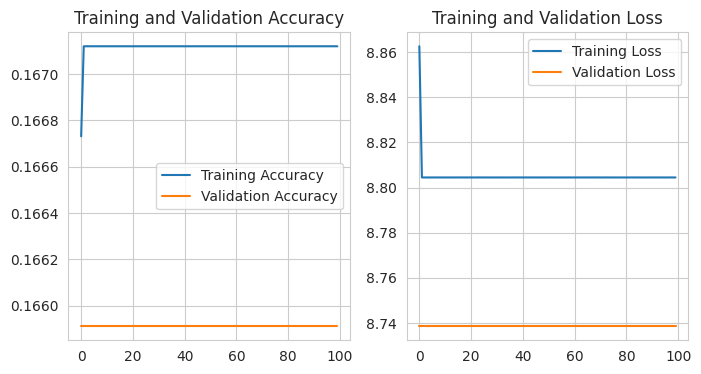

93/93 [==============================] - 0s 1ms/step
                    precision    recall  f1-score   support

           WALKING       0.17      1.00      0.29       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.00      0.00      0.00       532
            LAYING       0.00      0.00      0.00       537

          accuracy                           0.17      2947
         macro avg       0.03      0.17      0.05      2947
      weighted avg       0.03      0.17      0.05      2947


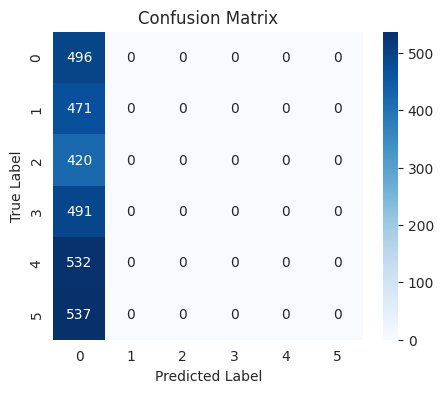

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

model = Sequential([
    Dense(units=512, input_shape=(253,)),
    Dense(128, activation='relu'),
    Dense(6)
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy', metrics.Precision(), metrics.Recall()])
print_metrics(model, X_train, X_test, X_heldback)

In [46]:
import keras
from keras_tuner import HyperParameters
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout


def build_model(hp: HyperParameters):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_0',
                                 min_value=32,
                                 max_value=512,
                                 step=32),
                    activation='relu',
                    input_dim=253))
    for i in range(hp.Int('num_layers', 1, 7)):
        model.add(Dense(units=hp.Int('units_' + str(i + 1),
                                     min_value=32,
                                     max_value=1024,
                                     step=32),
                        activation='relu'))
        model.add(Dropout(hp.Float('dropout_' + str(i + 1),
                                   min_value=0.0,
                                   max_value=0.5,
                                   step=0.1)))
    model.add(Dense(6, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model

In [47]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=trials,
    executions_per_trial=3,
    directory='.model_cache',
    project_name='Project Human Activities'
)

tuner.search(X_train, y_train,
             epochs=epochs,
             batch_size=10,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 13m 38s]
val_accuracy: 0.973103662331899

Best val_accuracy So Far: 0.9808099071184794
Total elapsed time: 04h 15m 03s


In [48]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [49]:
best_hyperparameters.__dict__

{'_name_scopes': [],
 '_conditions': [],
 '_hps': defaultdict(list,
             {'units_0': [Int(name: 'units_0', min_value: 32, max_value: 512, step: 32, sampling: linear, default: 32)],
              'num_layers': [Int(name: 'num_layers', min_value: 1, max_value: 7, step: 1, sampling: linear, default: 1)],
              'units_1': [Int(name: 'units_1', min_value: 32, max_value: 1024, step: 32, sampling: linear, default: 32)],
              'dropout_1': [Float(name: 'dropout_1', min_value: '0.0', max_value: '0.5', step: '0.1', sampling: 'linear', default: '0.0')],
              'learning_rate': [Choice(name: 'learning_rate', values: [0.01, 0.001, 0.0001], ordered: True, default: 0.01)],
              'units_2': [Int(name: 'units_2', min_value: 32, max_value: 1024, step: 32, sampling: linear, default: 32)],
              'dropout_2': [Float(name: 'dropout_2', min_value: '0.0', max_value: '0.5', step: '0.1', sampling: 'linear', default: '0.0')],
              'units_3': [Int(name: 'uni

In [50]:
best_model = tuner.get_best_models(1)[0]
best_model.evaluate(X_heldback, y_heldback, batch_size=10)

295/295 [==============================] - 1s 2ms/step - loss: 0.0613 - accuracy: 0.9460 - precision: 0.9472 - recall: 0.9427


[0.061330199241638184,
 0.9460468292236328,
 0.9471530914306641,
 0.9426535367965698]

Epoch 1/100
515/515 [==============================] - 4s 4ms/step - loss: 0.0064 - accuracy: 0.9930 - precision: 0.9930 - recall: 0.9932 - val_loss: 0.0225 - val_accuracy: 0.9796 - val_precision: 0.9796 - val_recall: 0.9801
Epoch 2/100
515/515 [==============================] - 2s 4ms/step - loss: 0.0063 - accuracy: 0.9938 - precision: 0.9936 - recall: 0.9934 - val_loss: 0.0370 - val_accuracy: 0.9674 - val_precision: 0.9669 - val_recall: 0.9674
Epoch 3/100
515/515 [==============================] - 2s 4ms/step - loss: 0.0072 - accuracy: 0.9911 - precision: 0.9914 - recall: 0.9903 - val_loss: 0.0267 - val_accuracy: 0.9746 - val_precision: 0.9750 - val_recall: 0.9719
Epoch 4/100
515/515 [==============================] - 2s 4ms/step - loss: 0.0056 - accuracy: 0.9940 - precision: 0.9940 - recall: 0.9938 - val_loss: 0.0241 - val_accuracy: 0.9751 - val_precision: 0.9759 - val_recall: 0.9737
Epoch 5/100
515/515 [==============================] - 2s 4ms/step - loss: 0.0056 - accuracy: 0.9944

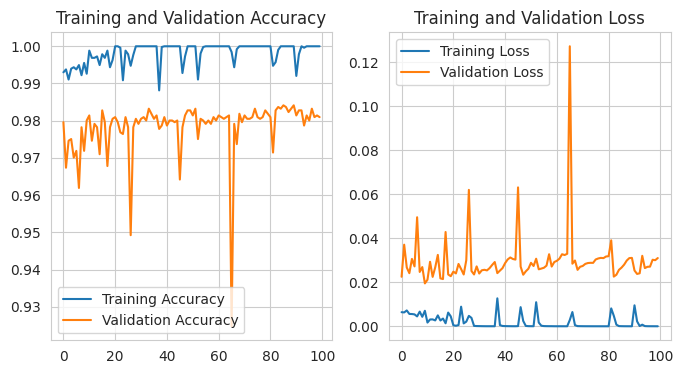

93/93 [==============================] - 0s 1ms/step
                    precision    recall  f1-score   support

           WALKING       0.93      0.99      0.96       496
  WALKING_UPSTAIRS       0.94      0.93      0.93       471
WALKING_DOWNSTAIRS       0.97      0.92      0.95       420
           SITTING       0.94      0.89      0.92       491
          STANDING       0.90      0.95      0.92       532
            LAYING       1.00      0.99      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.94      0.95      2947
      weighted avg       0.95      0.95      0.95      2947


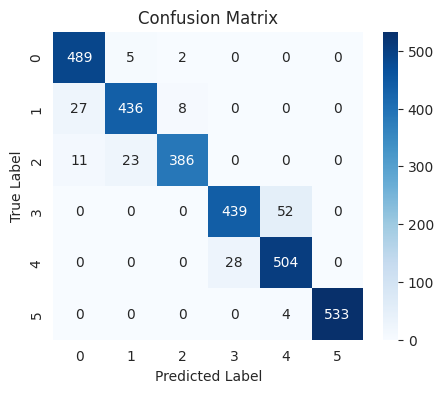

In [51]:
print_metrics(best_model, X_train, X_test, X_heldback)

In [52]:
model.metrics

## CNN

In [53]:
X_train_cnn = X_train.to_numpy().reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.to_numpy().reshape(-1, X_train.shape[1], 1)
X_heldback_cnn = X_heldback.to_numpy().reshape(-1, X_heldback.shape[1], 1)
X_train_cnn

array([[[ 0.28432034],
        [-0.01989251],
        [-0.11818383],
        ...,
        [ 0.05570961],
        [ 0.33290566],
        [ 0.56399713]],

       [[ 0.26732558],
        [-0.02415528],
        [-0.07898562],
        ...,
        [-0.59447358],
        [ 0.82860982],
        [ 0.84624269]],

       [[ 0.32749528],
        [-0.05775618],
        [-0.17817215],
        ...,
        [ 0.80722104],
        [-0.95179633],
        [ 0.60314369]],

       ...,

       [[ 0.29394596],
        [-0.01834118],
        [-0.11991614],
        ...,
        [-0.48854194],
        [ 0.09589477],
        [-0.29716206]],

       [[ 0.28047468],
        [-0.0189761 ],
        [-0.11375647],
        ...,
        [ 0.01429139],
        [-0.29034651],
        [ 0.60234438]],

       [[ 0.26358177],
        [ 0.00692832],
        [-0.09531975],
        ...,
        [-0.70078359],
        [-0.2367568 ],
        [ 0.34408288]]])

In [54]:
from tensorflow import keras
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout
from keras import Model as Model_


class CNN_Model(Model_):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.conv1 = Conv1D(25, 3, activation='relu')
        self.maxpool = MaxPooling1D()
        self.conv2 = Conv1D(32, 3, activation='relu')
        self.globalmaxpool = GlobalMaxPooling1D()
        self.dropout = Dropout(0.2)
        self.outputLayer = Dense(6, activation='softmax')

    # to use the model 
    def call(self, input_x):
        output = input_x
        output = self.conv1(output)
        output = self.maxpool(output)
        output = self.conv2(output)
        output = self.globalmaxpool(output)
        output = self.dropout(output)
        return self.outputLayer(output)



Epoch 1/100
515/515 [==============================] - 2s 3ms/step - loss: 1.5090 - accuracy: 0.3820 - precision_1: 0.7319 - recall_1: 0.0196 - val_loss: 1.0725 - val_accuracy: 0.6641 - val_precision_1: 0.9643 - val_recall_1: 0.0612
Epoch 2/100
515/515 [==============================] - 2s 3ms/step - loss: 0.9024 - accuracy: 0.6341 - precision_1: 0.7882 - recall_1: 0.3638 - val_loss: 0.6571 - val_accuracy: 0.8046 - val_precision_1: 0.8957 - val_recall_1: 0.5644
Epoch 3/100
515/515 [==============================] - 2s 3ms/step - loss: 0.6569 - accuracy: 0.7392 - precision_1: 0.8151 - recall_1: 0.6110 - val_loss: 0.5107 - val_accuracy: 0.8454 - val_precision_1: 0.8853 - val_recall_1: 0.7312
Epoch 4/100
515/515 [==============================] - 2s 3ms/step - loss: 0.5500 - accuracy: 0.7870 - precision_1: 0.8359 - recall_1: 0.7068 - val_loss: 0.4495 - val_accuracy: 0.8404 - val_precision_1: 0.8741 - val_recall_1: 0.7806
Epoch 5/100
515/515 [==============================] - 2s 3ms/step -

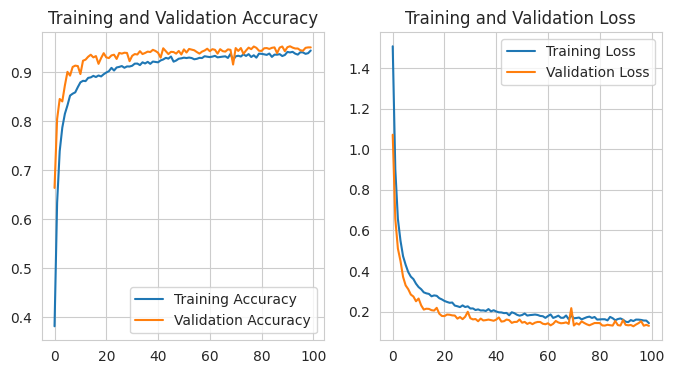

93/93 [==============================] - 0s 865us/step
                    precision    recall  f1-score   support

           WALKING       0.85      0.90      0.87       496
  WALKING_UPSTAIRS       0.82      0.85      0.84       471
WALKING_DOWNSTAIRS       0.95      0.85      0.90       420
           SITTING       0.82      0.84      0.83       491
          STANDING       0.86      0.83      0.85       532
            LAYING       0.99      0.99      0.99       537

          accuracy                           0.88      2947
         macro avg       0.88      0.88      0.88      2947
      weighted avg       0.88      0.88      0.88      2947


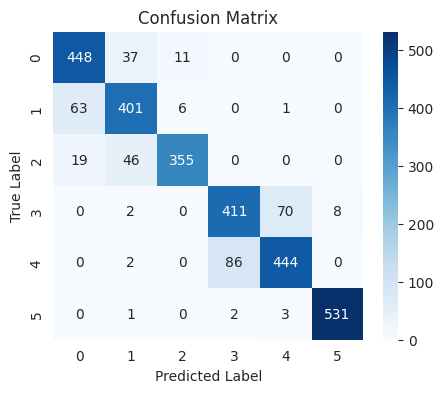

In [55]:
# initiate a model instance
model = CNN_Model()
# compile the model
model.compile(
    optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    # metrics=[keras.metrics.CategoricalAccuracy(name='accuracy')],
    metrics=['accuracy', metrics.Precision(), metrics.Recall()]
)

# history = model.fit(
#     X_train_cnn,
#     y_train,
#     batch_size=10,
#     epochs=2,
#     validation_data=(X_test_cnn, y_test),
# )
# model.evaluate(X_heldback_cnn, y_heldback, batch_size=10)
print_metrics(model, X_train_cnn, X_test_cnn, X_heldback_cnn)

In [56]:
def build_cnn_model(hp):
    model = CNN_Model()

    # Tune the number of filters in the first Conv1D layer
    hp_filters_1 = hp.Int('filters_1', min_value=16, max_value=128, step=16)
    model.conv1 = Conv1D(filters=hp_filters_1, kernel_size=3, activation='relu')

    # Tune the number of filters in the second Conv1D layer
    hp_filters_2 = hp.Int('filters_2', min_value=16, max_value=128, step=16)
    model.conv2 = Conv1D(filters=hp_filters_2, kernel_size=3, activation='relu')

    # Tune the dropout rate
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.dropout = Dropout(hp_dropout)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy',               
                  metrics=['accuracy', metrics.Precision(), metrics.Recall()])

    return model

In [57]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=trials,
    executions_per_trial=3,
    directory='.model_cache',
    project_name='Project Human Activites CNN'
)

history = tuner.search(X_train, y_train, epochs=epochs, validation_data=(X_test_cnn, y_test))
history

Trial 5 Complete [00h 03m 30s]
val_accuracy: 0.9826231400171915

Best val_accuracy So Far: 0.9841341773668925
Total elapsed time: 02h 58m 43s


In [58]:
best_model = tuner.get_best_models(1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
best_hyperparameters.__dict__

{'_name_scopes': [],
 '_conditions': [],
 '_hps': defaultdict(list,
             {'units_0': [Int(name: 'units_0', min_value: 32, max_value: 512, step: 32, sampling: linear, default: 32)],
              'num_layers': [Int(name: 'num_layers', min_value: 1, max_value: 7, step: 1, sampling: linear, default: 1)],
              'units_1': [Int(name: 'units_1', min_value: 32, max_value: 1024, step: 32, sampling: linear, default: 32)],
              'dropout_1': [Float(name: 'dropout_1', min_value: '0.0', max_value: '0.5', step: '0.1', sampling: 'linear', default: '0.0')],
              'learning_rate': [Choice(name: 'learning_rate', values: [0.01, 0.001, 0.0001], ordered: True, default: 0.01)],
              'units_2': [Int(name: 'units_2', min_value: 32, max_value: 1024, step: 32, sampling: linear, default: 32)],
              'dropout_2': [Float(name: 'dropout_2', min_value: '0.0', max_value: '0.5', step: '0.1', sampling: 'linear', default: '0.0')],
              'units_3': [Int(name: 'uni

In [59]:
best_model = tuner.get_best_models(1)[0]
best_model.evaluate(X_heldback_cnn, y_heldback, batch_size=10)

295/295 [==============================] - 1s 2ms/step - loss: 0.2496 - accuracy: 0.9348 - precision: 0.9360 - recall: 0.9328


[0.24956221878528595,
 0.9348490238189697,
 0.9359890818595886,
 0.9328130483627319]

Epoch 1/100
515/515 [==============================] - 3s 4ms/step - loss: 0.0185 - accuracy: 0.9841 - precision: 0.9848 - recall: 0.9835 - val_loss: 0.0353 - val_accuracy: 0.9665 - val_precision: 0.9686 - val_recall: 0.9651
Epoch 2/100
515/515 [==============================] - 2s 4ms/step - loss: 0.0241 - accuracy: 0.9798 - precision: 0.9794 - recall: 0.9792 - val_loss: 0.0365 - val_accuracy: 0.9714 - val_precision: 0.9702 - val_recall: 0.9742
Epoch 3/100
515/515 [==============================] - 2s 4ms/step - loss: 0.0161 - accuracy: 0.9850 - precision: 0.9852 - recall: 0.9848 - val_loss: 0.0383 - val_accuracy: 0.9801 - val_precision: 0.9796 - val_recall: 0.9801
Epoch 4/100
515/515 [==============================] - 2s 4ms/step - loss: 0.0125 - accuracy: 0.9911 - precision: 0.9905 - recall: 0.9909 - val_loss: 0.0437 - val_accuracy: 0.9714 - val_precision: 0.9714 - val_recall: 0.9710
Epoch 5/100
515/515 [==============================] - 2s 4ms/step - loss: 0.0187 - accuracy: 0.9846

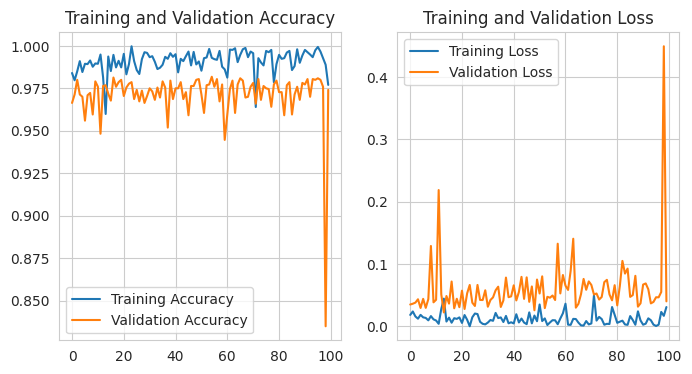

93/93 [==============================] - 0s 959us/step
                    precision    recall  f1-score   support

           WALKING       0.92      0.98      0.95       496
  WALKING_UPSTAIRS       0.94      0.91      0.92       471
WALKING_DOWNSTAIRS       0.97      0.94      0.95       420
           SITTING       0.92      0.87      0.90       491
          STANDING       0.86      0.94      0.90       532
            LAYING       1.00      0.96      0.98       537

          accuracy                           0.93      2947
         macro avg       0.94      0.93      0.93      2947
      weighted avg       0.94      0.93      0.93      2947


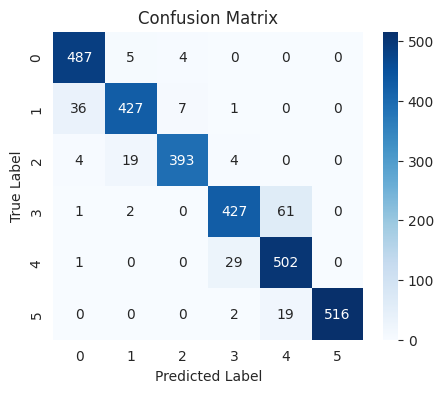

In [60]:
print_metrics(best_model, X_train_cnn, X_test_cnn, X_heldback_cnn)